# Praktikum Visi Komputer
## Modul ke-4

## Deteksi dan tracking/lacak bagian dari tubuh 

Pada modul ini, kita akan belajar cara mendeteksi dan melacak bagian tubuh yang berbeda secara langsung dari video stream. Kita akan mulai dengan membahas pipeline/saluran pendeteksi wajah dari dasar. Lalu menggunakan framework tersebut untuk mendeteksi dan melacak bagian tubuh lain seperti mata, telinga, mulut dan hidung.


### Penggunaan Haar cascades untuk mendeteksi benda

Haar cascade ini sebetulnya cascade classifier berdasarkan fitur Haar. Untuk memahami hal ini, kita perlu sedikit membahas mengapa Haar cascade ini diperlukan. 

Pada tahun 2001, Paul Viola dan Michael Jones mempublikasikan metode deteksi objek yang sangat efektif. Metode tersebut menjadi sangat penting dalam perkembangan machine learning (pembelajaran mesin). Dalam [makalahnya](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf), mereka menjelaskan teknik machine learning di mana boosted cascade dari classifier sederhana digunakan untuk classifier keseluruhan yang memiliki kinerja sangat baik. Dengan cara ini, kita dapat menghindari untuk membuat satu classifier kompleks yang bekerja dengan akurasi tinggi. Sebab membangun suatu single-step classifier yang robust memerlukan proses komputasi yang intensive. Selain itu juga, perlu banyak data training untuk membangun classifier. Sehingga model menjadi kompleks dan bisa saja performanya tidak sesuai dengan yang diharapkan.

Sebagai contoh, kita ingin mendeteksi objek kucing. Untuk menyelesaikan masalah ini, kita perlu membangun sistem machine learning yang bisa belajar bagaimana bentuk kucing. Sistem tersebut seharusnya dapat memberitahukan pada kita, apakah suatu citra mengandung objek kucing atau tidak. Untuk menyelesaikan masalah tersebut maka kita perlu melatih sistem dengan memasukkan banyak gambar kucing dan bukan kucing. Gambar kucing disebut sebagai citra positif dan gambar bukan kucing sebagai citra negatif.

Sebetulnya banyak cara melakukan pelatihan/training. Namun semua teknik tradisional ini memerlukan proses komputasi yang intensive sehingga menghasilkan model yang kompleks. Model yang kompleks tersebut akan susah diimplementasikan pada sistem real-time. Oleh karena itu, kita perlu membuat classifier yang sederhana. Namun yang ditakutkan, jika classifier sederhana, hasilnya menjadi tidak akurat. Pilihan antara kecepatan dan akurasi adalah hal yang biasa pada pmachine learning (pembelajaran mesin). Kita mengatasi masalah ini dengan membangun sekumpulan classifier sederhana lalu melakukan cascade terhadap classifier tersebut untuk membentuk classifier yang digabungkan dan robust. Untuk membuat semua classifier berjalan dengan baik, kita perlu kreativitas dalam melakukan langkah cascading. Inilah alasan mengapa metode Viola-Jones menjadi sangat efektif.

Di sini kita mencoba untuk mendeteksi wajah. Apabila kita ingin membangun machine learning, maka kita perlu melakukan ekstraksi fitur dari semua citra yang ada dalam data. Berdasarkan fitur tersebut, sistem algoritma machine learning akan belajar bagaimana bentuk wajah. Kita akan menggunakan fitur Haar untuk membangun vektor dari fitur. Fitur Haar berupa penjumlahan dan pengurangan sederhana dari tambalan-tambalan (patches) pada citra. Proses ini dilakukan pada berbagai ukuran citra untuk memastikan sistem yang dibangun tidak tergantung pada skala.

Fitur yang sudah diekstrak akan dikirim ke classifier yang saling cascade. Kita hanya perlu mengekstrak sub-region persegi yang berbeda, lalu membuangnya apabila tidak mengandung wajah di dalamnya. Dengan cara ini, kita sampai pada kesimpulan akhir lebih cepat dengan memastikan apakah sub-region persegi mengandung wajah atau tidak.


### Citra integral

Komputasi menggunakan fitur Haar memerlukan proses komputasi penjumlahan dari banyak region persegi yang berbeda di dalam citra. Apabila kita ingin membangun fitur set yang efektif, maka kita perlu menghitung penjumlahan pada bermacam-macam skala. Proses ini berjalan secara repetitive dan sangat lambat. Sehingga kita tidak mungkin melakukan banyak sekali perulangan untuk menghitung penjumlahan ini. Oleh karena itu, kita gunakan citra integral (integral image).

[![T6HahX.jpg](https://i.im.ge/2021/09/16/T6HahX.jpg)](https://im.ge/i/T6HahX)

Pada citra integral, nilai dari setiap titik adalah jumlah semua piksel di atasnya lalu ke kiri dan termasuk juga piksel dari titik tersebut.

[![T6H7Y8.png](https://i.im.ge/2021/09/16/T6H7Y8.png)](https://im.ge/i/T6H7Y8)

Dengan menggunakan citra integral, kita menghemat waktu saat menghitung jumlah dari semua piksel pada suatu persegi. Sebab kita hanya perlu melakukan kalkulasi pada 4 sisi dari persegi. Lihat contoh di bawah.

[![T6HDBh.jpg](https://i.im.ge/2021/09/16/T6HDBh.jpg)](https://im.ge/i/T6HDBh)

Ketika kita menambahkan semua piksel pada kotak biru, hasilnya adalah 8. Proses di sini melibatkan 6 unsur yang terlibat dalam kalkulasi. Berikutnya kita coba hitung dengan menggunakan citra integral. Kita hanya perlu nilai dari setiap sudut pada persegi. Lalu tambah sudut yang berwarna hijau kemudian dikurangkan dengan sudut yang berwarna merah. 

21+1 - 11 -3 =8

Di sini kita dapatkan nilai yang sama dengan hanya melibatkan 4 unsur dalam proses kalkulasi. Berapapun jumlah piksel yang ingin dikalkulasi, dengan cara ini kita hanya perlu menghitung 4 unsur tersebut.


### Deteksi dan lacak/tracking wajah

OpenCV telah menyediakan framework deteksi wajah. Kita hanya perlu membuka file cascade dan menggunakannya untuk mendeteksi wajah pada citra.


In [13]:
#Deteksi wajah pada gambar
import cv2

#download folder cascade di https://drive.google.com/file/d/1AcMPiaExIdzCmBc2E24exnPtwIB3_ir6/view?usp=sharing
# face_cascade = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_default.xml')
#atau
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

#download gambar di https://drive.google.com/file/d/1UceTLyCk38JRqOqq7mJZazi9ZdEQVu1U/view?usp=sharing
img = cv2.imread('./gambar/woodcutters.jpg')
# img = cv2.imread('./gambar/nidriper.jpg')

# ubah jadi gray karna deteksi wajah gak perlu data citra berwarna
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# proses cascade dilakukan utk beberapa skala
faces = face_cascade.detectMultiScale(gray, 1.08, 5)

for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
cv2.namedWindow('Woodcutters Detected!')
cv2.imshow('Woodcutters Detected!', img)
cv2.imwrite('./gambar/woodcutters_detected.jpg', img)
cv2.waitKey(0)

-1

In [14]:
#Deteksi wajah dari live camera
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_alt.xml')
#atau
#face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(0)
scaling_factor = 0.5

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=scaling_factor, fy=scaling_factor,
    interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    face_rects = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3)
        
    cv2.imshow('Face Detector', frame)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

### Deteksi mata

Sesudah kita memahami cara mendeteksi wajab, kita dapat mengeneralisasi konsep deteksi bagian tubuh lainnya. Framework Viola-Jones dapat diaplikasikan pada objek apapun. Akurasi dan robustness akan sangat tergantung pada keunikan dari objek. Contohnya wajah manusia memiliki karakteristik unik sehingga mudah untuk melatih sistem menjadi robust. Namun jika objek berupa handuk, maka objek ini terlalu umum dan susah menemukan karakterisktik uniknya. 

Berikut ini akan kita lihat proses deteksi mata.

In [15]:
#Deteksi mata
#Agar proses deteksi mata menjadi lebih cepat maka pertama sekali kita deteksi wajah
#baru kemudian dari region wajah dilakukan deteksi mata
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('./cascades/haarcascade_eye.xml')
if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')
if eye_cascade.empty():
    raise IOError('Unable to load the eye cascade classifier xml file')
    
cap = cv2.VideoCapture(0)
ds_factor = 0.5

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=ds_factor, fy=ds_factor, interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (x_eye,y_eye,w_eye,h_eye) in eyes:
            center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))
            radius = int(0.3 * (w_eye + h_eye))
            color = (0, 255, 0)
            thickness = 3
            cv2.circle(roi_color, center, radius, color, thickness)
            
    cv2.imshow('Eye Detector', frame)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [16]:
#Deteksi senyum
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml')


def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), ((x + w), (y + h)), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)

        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
    return frame


video_capture = cv2.VideoCapture(0)
while video_capture.isOpened():
# Captures video_capture frame by frame
    _, frame = video_capture.read()
    
    # To capture image in monochrome
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # calls the detect() function
    canvas = detect(gray, frame)

    # Displays the result on camera feed
    cv2.imshow('Video', canvas)

    # The control breaks once q key is pressed
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

# Release the capture once all the processing is done.
video_capture.release()
cv2.destroyAllWindows()


In [57]:
#Latihan 1
#Kumpulkan 10 gambar yang mengandung ramai orang (>2 orang), bisa gambar foto anda dan keluarga
#bisa juga foto anda dan saudara, bisa juga foto anda dan teman-teman, bebas saja
#Kemudian lakukan deteksi wajah dan tampilkan gambar hasil deteksi dengan matplotlib
#lalu hitung probabilitas setiap wajah pada suatu gambar yang berhasil terdeteksi (secara manual)
#Contoh pada gambar 1, ada 5 orang, apabila semua wajah berhasil terdeteksi semuanya maka
#probabilitas adalah 1
#Contoh pada gambar 2, ada 6 orang, apabila 4 wajah berhasil terdeteksi maka probabilitas
#adalah 4/6 atau 2/3
#Hitungan probabilitas tersebut juga ditampilkan/dicetak

#Deteksi wajah pada gambar
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
for no in range(1,11): # Loop 10 times
    img = cv2.imread('./gambar/img'+str(no)+'.jpeg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.08, 5)

    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 4)

    cv2.namedWindow('Faces Detected!')
    cv2.imshow('Faces Detected!', img)
    cv2.imwrite('./gambar/detected/img'+str(no)+'_detected.jpg', img)
    cv2.waitKey(0)


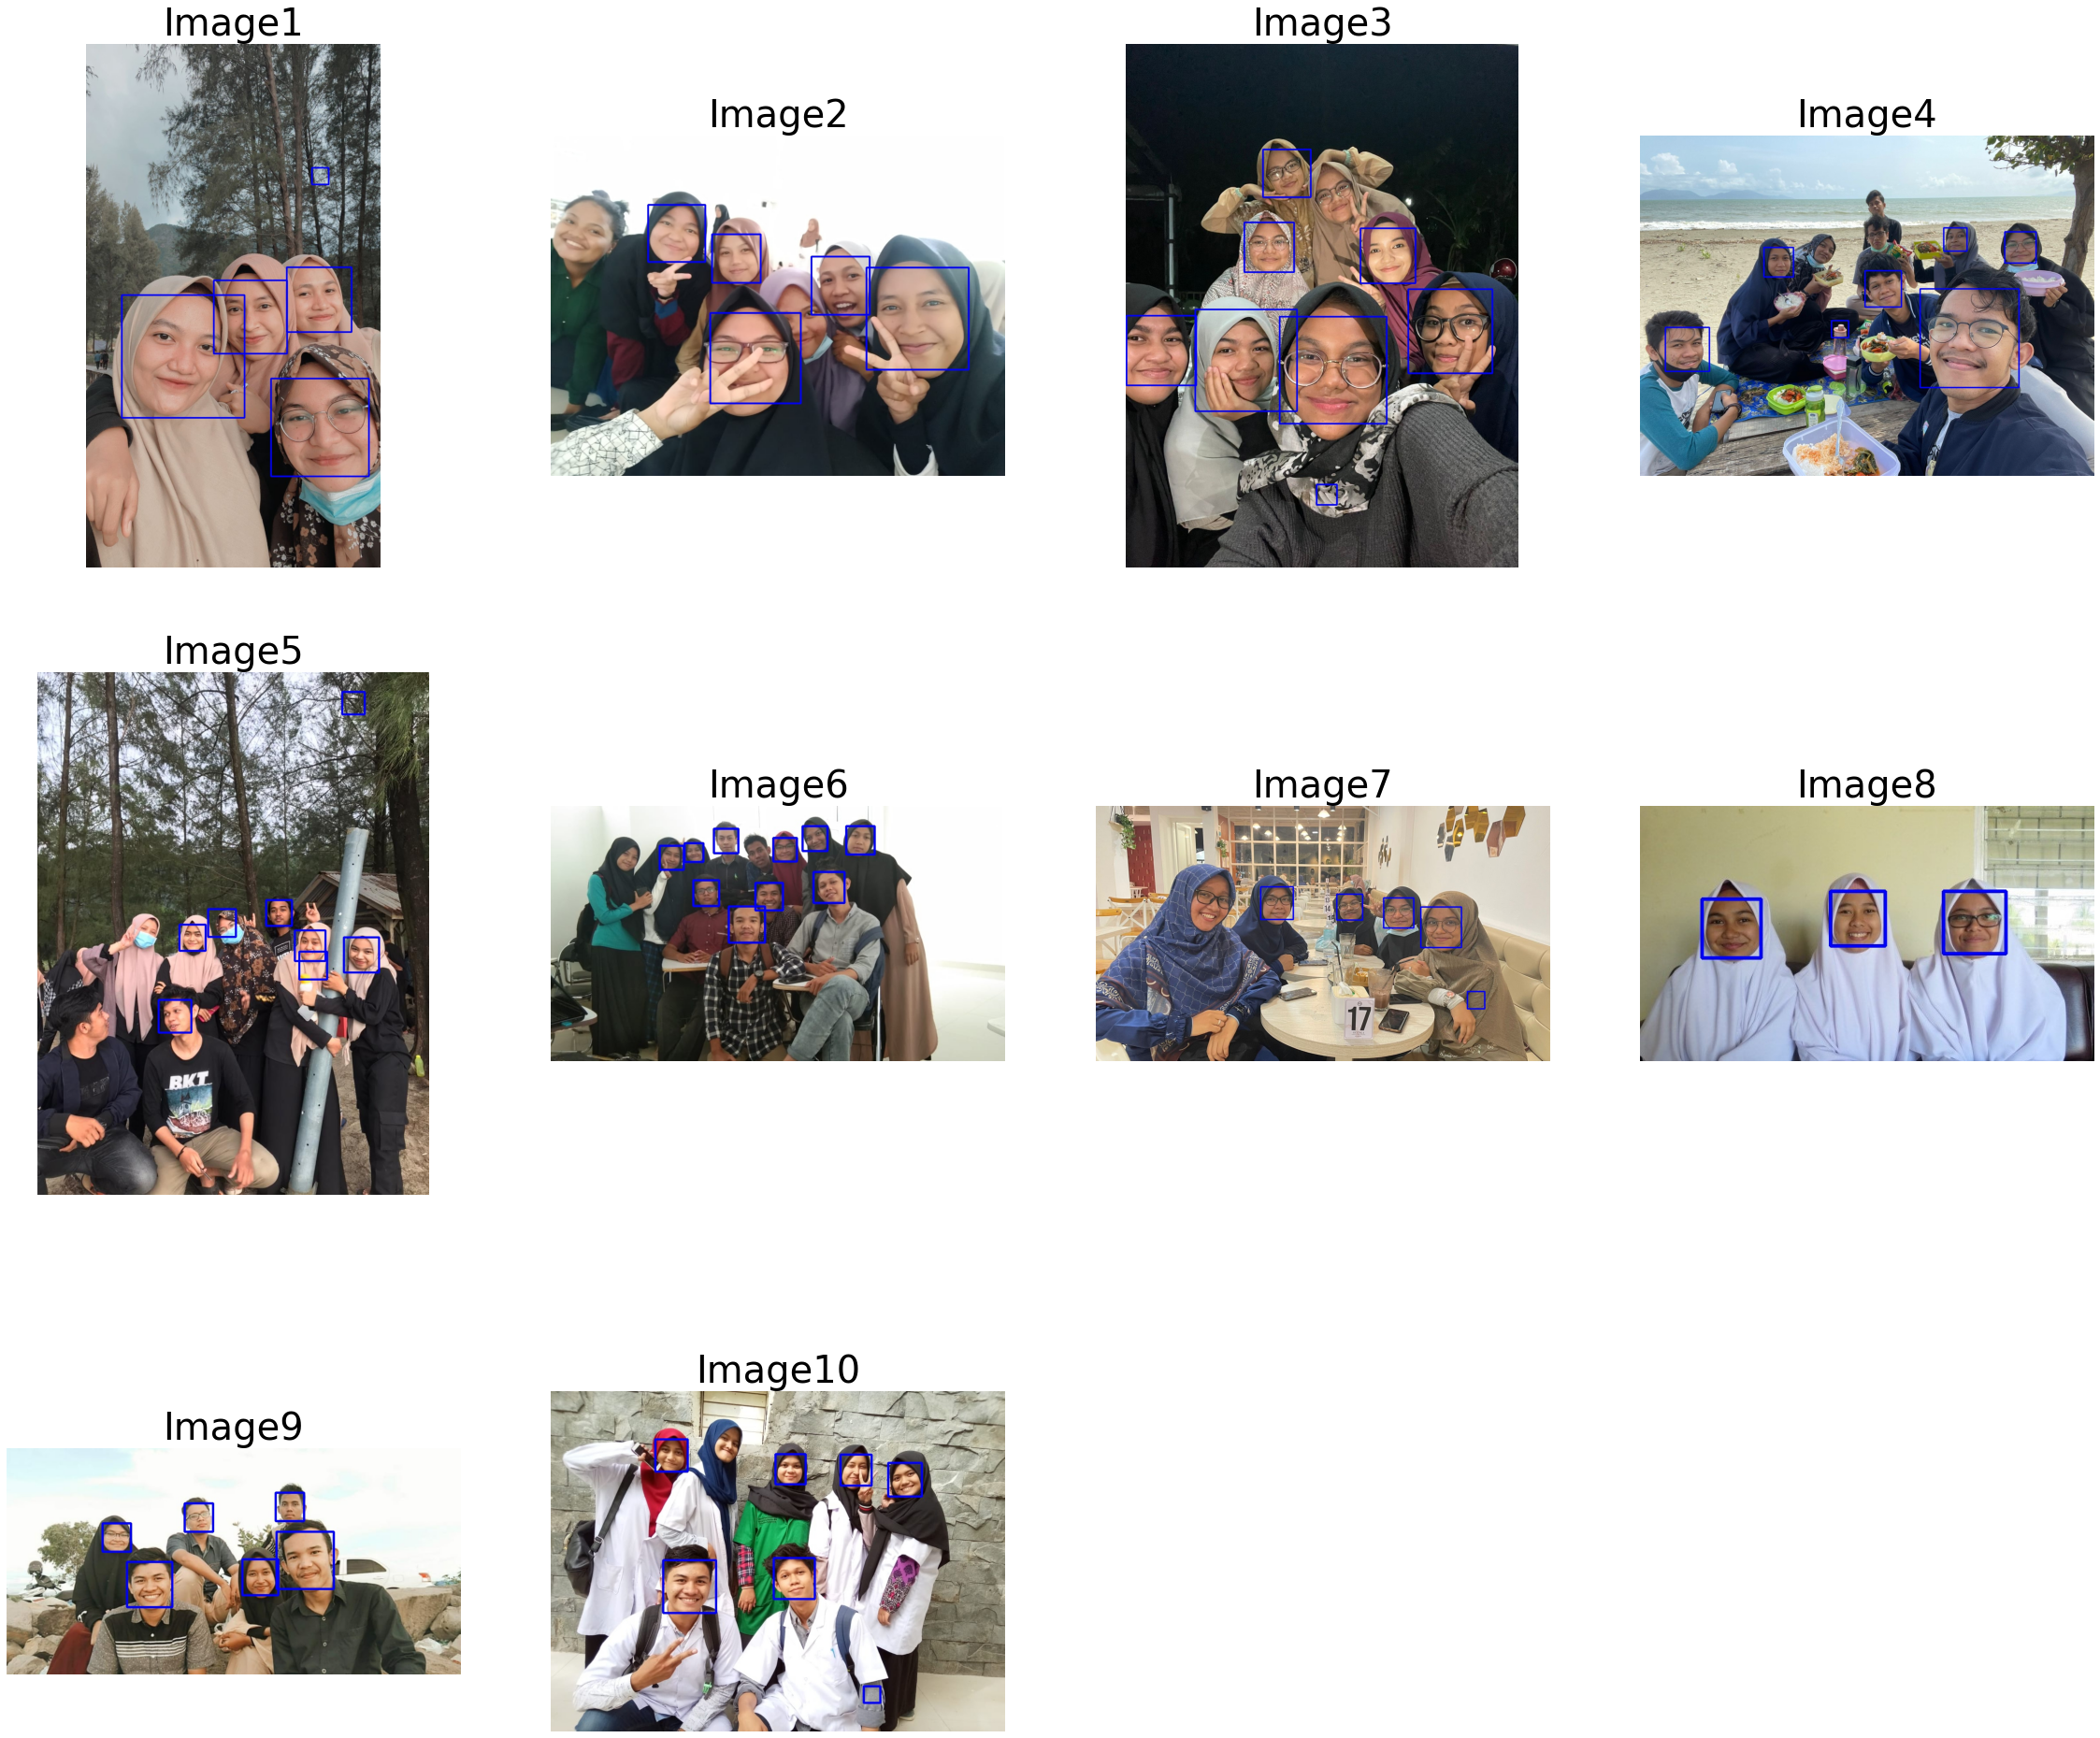

In [58]:
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(40, 35))

# setting values to rows and column variables
rows = 3
columns = 4

Images = []
# reading images
for no in range(10):
    Images.append(cv2.imread('gambar/detected/img'+str(no+1)+'_detected.jpg'))

for no in range(10):
    fig.add_subplot(rows, columns, no+1)
    plt.imshow(cv2.cvtColor(Images[no], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(label='Image'+str(no+1),fontsize=40,)



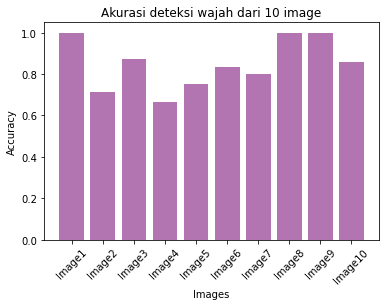

In [59]:
import matplotlib.pyplot as plt

# perhitungan akurasi
acc = [1, 5/7, 7/8, 2/3, 3/4, 5/6, 4/5, 1, 1, 6/7]

left = [*range(1,11)]
height = acc
tick_label = ['Image1', 'Image2', 'Image3', 'Image4', 'Image5',
              'Image6', 'Image7', 'Image8', 'Image9', 'Image10']

plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = (0.5,0.1,0.5,0.6))
plt.xticks(rotation = 45)

plt.xlabel('Images')
plt.ylabel('Accuracy')
plt.title('Akurasi deteksi wajah dari 10 image')

plt.show()

